# Obligatorisk innlevering 2 - oppgave 1

Denne oppgaven tar for seg et datasett fra Food Mart, som er ennærbutikkjede i USA. Food Mart har i dette datasettet samlet endel data i forbindelse med mediekampanjer. Din oppgave er å forutsi kostnadene for mediekampanjer i matvaremarkedet på grunnlag av funksjonene som tilbys.

In [20]:
# Importer resten av pakkene du trenger her:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, RepeatedKFold, KFold
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error



In [21]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett1.csv")
# Her deler jeg datasettet inn i egenskaper (X) og target (y)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)
# PS: Ikke endre denne kodecellen!

#### Oppgave 1.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? 

Begrunn svaret

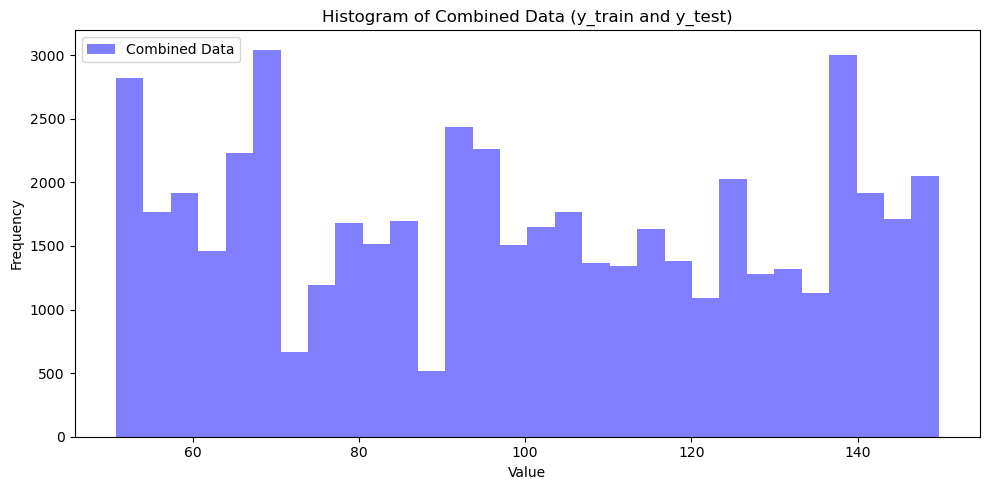

In [22]:


combined_data = np.concatenate((y_train, y_test))

plt.figure(figsize=(10, 5))
plt.hist(combined_data, bins=30, alpha=0.5, label='Combined Data', color='blue')
plt.title('Histogram of Combined Data (y_train and y_test)')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

**Svar:**

Ettersom dataen er jevnt fordelt utover vil jeg si dette er et regresjonproblem. I et klassifisering problem vil du oftere se klasser hvor dataen er samlet i grupper.

#### Oppgave 1.2) 

fullfør funksjonen under slik at den tar inn både egenskapene og target, legger disse sammen i samme matrise igjen og visualiser dataene som en korrelasjonsmatrise (poenget er at du skal kunne se hvordan egenskapene korrelerer med target).

* Beskriv hvilke egenskaper du ser korrelerer mest med target

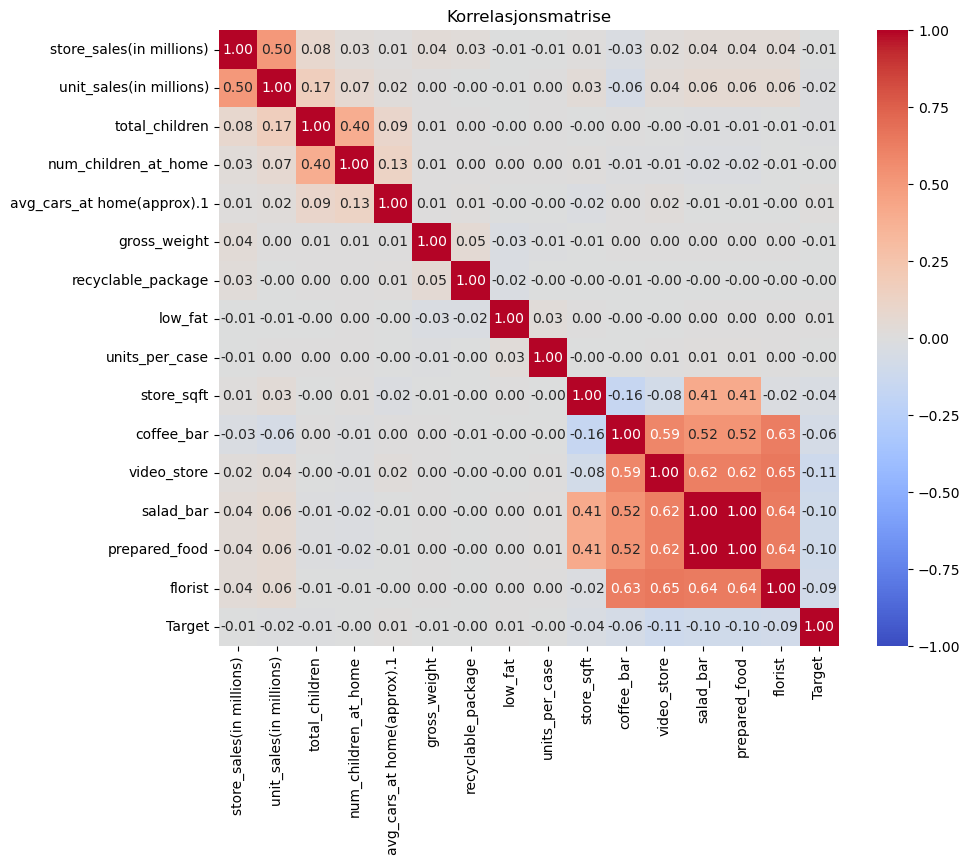

In [23]:
def korrelasjonsmatrise(X, y):
    X_temp = X.copy()
    y_temp = y.copy()
    X_temp['Target'] = y_temp
    correlation_matrix = X_temp.corr()
    
    # Lag en heatmap for å visualisere korrelasjonen
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
    plt.title('Korrelasjonsmatrise')
    plt.show()

# Bruk korrelasjonsmatrisefunksjonen for å vise matrisen
korrelasjonsmatrise(X_train, y_train)
    

**Svar:**

Basert på matrisen, kan vi se at det er svært lite korrelasjon med Target, den med meest korrelasjon er "Video_store" på kun 0.11 noe som er svært lite. Dette sier oss at det er lite korelasjon mellom target og andre kolonner 

#### Oppgave 1.3) 
Velg en modellarkitektur (gjerne fra Scikit-Learn) og gjør et strukturert hyperparametersøk. 
* Gjør et søk på minst 3 paramtere og minst 2 verdier pr parameter
* Bruk 3-folds kryssvalidering for hver parameterkombinasjon
* Velg en metrikk som passer for målet (tips: "neg_mean_squared_error" i sklearn) 
* Skriv ut den parameterkobinasjonen som ga den beste skåren, samt skåren. Kommenter resultatet

In [24]:
param_grid_reg = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False],
    'n_jobs': [-1, 1, 2]
}

linereg = LinearRegression()

kf = KFold(n_splits=3, shuffle=True, random_state=0)

In [25]:
grid_search = GridSearchCV(estimator=linereg, param_grid=param_grid_reg, cv=kf, scoring='neg_mean_squared_error')



grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameter combination:", best_params)
print("Best score (neg_mean_squared_error):", best_score)

Best parameter combination: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}
Best score (neg_mean_squared_error): -888.0929087334811


**Svar:**
Best parameter combination: {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False} Best score (neg_mean_squared_error): -888.0929087334811
-888 er et meget stort tall som kun gir mening om tallet vi sammenligner det med er veldig høyt. 

#### Oppgave 1.4) 
Bruk hyperparameterkombinasjonen fra oppgave 1.3 og kryssvalider den modellen på nytt med K >= 5 
* Logg "mean absolute error" og "mean squared error" for hver kryssvalideringsrunde
* Oppgi gjennomsnitt og standardavvik for "mean absolute error" og "mean squared error" etter kryssvalideringen og kommenter resultatet
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i treningsdataene? 

In [26]:

best_params = {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}

kf_updated = KFold(n_splits=5, shuffle=True, random_state=0)

linereg_updated = LinearRegression(**best_params)



cv_scores_mae = cross_val_score(linereg_updated, X, y, cv=kf_updated, scoring=make_scorer(mean_absolute_error))

cv_scores_mse = cross_val_score(linereg_updated, X, y, cv=kf_updated, scoring=make_scorer(mean_squared_error))

avg_score_mae = np.mean(cv_scores_mae)
avg_score_mse = np.mean(cv_scores_mse)

print("Cross-validation scores (MAE):", cv_scores_mae)
print("Average score (MAE):", avg_score_mae)
print("Cross-validation scores (MSE):", cv_scores_mse)
print("Average score (MSE):", avg_score_mse)

Cross-validation scores (MAE): [25.70489645 25.86974193 25.90235522 25.72271121 25.37126662]
Average score (MAE): 25.71419428486616
Cross-validation scores (MSE): [887.7643019  893.85648499 895.72549034 888.64952529 874.40463859]
Average score (MSE): 888.0800882224173


In [27]:
mae_values = np.array([25.70489645, 25.86974193, 25.90235522, 25.72271121, 25.37126662])
mse_values = np.array([887.7643019, 893.85648499, 895.72549034, 888.64952529, 874.40463859])

avg_mae = np.mean(mae_values)
std_mae = np.std(mae_values)
avg_mse = np.mean(mse_values)
std_mse = np.std(mse_values)

avg_target = np.mean(y)  # Replace 'y' with your actual target array

error_percentage_mae = (avg_mae / avg_target) * 100
error_percentage_mse = (np.sqrt(avg_mse) / avg_target) * 100  # Use sqrt for MSE to get RMSE

print("Average MAE:", avg_mae)
print("Standard Deviation MAE:", std_mae)
print("Average MSE:", avg_mse)
print("Standard Deviation MSE:", std_mse)
print("Average Target Value:", avg_target)
print("Error Percentage (MAE):", error_percentage_mae, "%")
print("Error Percentage (RMSE):", error_percentage_mse, "%")

Average MAE: 25.714194285999998
Standard Deviation MAE: 0.1883390445418132
Average MSE: 888.0800882219999
Standard Deviation MSE: 7.4734307433764755
Average Target Value: 99.32706442380702
Error Percentage (MAE): 25.888406584013314 %
Error Percentage (RMSE): 30.002570584821413 %


**Svar:**

Gjennomsnittlig absolutt feil (MAE) etter kryssvalideringen er omtrent 25.7142, med et standardavvik på ca. 0.1883. MAE er en måling av gjennomsnittlig avvik mellom modellens forutsagte verdier og de faktiske verdiene i datasettet ditt, 25 kan både være høyt og lavt spørs hva man måler. Gjennomsnittlig kvadratisk feil (MSE) etter kryssvalideringen er 888. Dette betyr at gjennomsnittlig feil for modellens prediksjoner er omtrent 888.0801 kvadrert enheter. Gjennomsnittlig MAE: 25.7142
Gjennomsnittlig faktisk pris i treningsdataene: 99.3271

Forholdet mellom gjennomsnittlig MAE og gjennomsnittlig faktisk pris er:

(25.7142 / 99.3271) ≈ 0.2588



#### Oppgave 1.5) 
Tren modellen en siste gang på alle treningsdataene og gjør prediksjon på testdataene (bruk de optimale parametrene fra oppgave 1.3)
* Hvor stor er den gjennomsnittlige feilen på prediksjonen sammenlignet med gjennomsnittlig faktisk pris i testdataene? 

In [24]:
optimal_params = {'copy_X': True, 'fit_intercept': True, 'n_jobs': -1, 'positive': False}

model = LinearRegression(**optimal_params)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

average_error = np.mean(np.abs(predictions - y_test))

average_actual_price = np.mean(y_test)

error_percentage = (average_error / average_actual_price) * 100

print("Average Prediction Error:", average_error)
print("Average Actual Price:", average_actual_price)
print("Error as a Percentage of Average Actual Price:", error_percentage, "%")


Average Prediction Error: 25.79337662131177
Average Actual Price: 99.30020325519818
Error as a Percentage of Average Actual Price: 25.97514987459155 %


**Svar:**

Den gjennomsnittelige feilen på daten er på 25% av den aktuelle prisen. Dette gir en indikasjon på hvor nøyaktig eller unøyaktig modellen er i forhold til faktiske priser i testdataene